# Apresentação:

    O objetivo desse aqui é explorar a API da Open AI para ver
    o quão artístico esses modelos consegues ser.

In [7]:
!pip install openai

# Autenticando:

    O primeiro paasso para utilizar esses modelos é autenticar
    a nossa aplicação nos servidores da Open AI para poder utilizar
    seus serviços.

In [16]:
# Package de Suporte:
import os
from IPython.display import Audio

# API Open AI
from openai import OpenAI

# API para acesso ao Drive:
#from google.colab import drive

# Mount your Google Drive
#drive.mount('/content/drive')

    # Puxando código:
    with open('drive/MyDrive/config.txt','r') as arq:
      API_KEY = arq.readlines()

In [17]:
# Autenticando:
os.environ["OPENAI_API_KEY"] = input("API KEY")

# Utilizando o gerador de Voz:

    Um dos modelos que a Open AI disponibiliza é o gerador de voz,
    o qual vamos utilizar para que termos a nossa versão do poema
    ressitado para nós.

In [18]:
# Instanciando Objeto:
client = OpenAI()

In [25]:
text = '''
De todas as rosas do mundo, fui escolher logo os teus espinhos.
tu me tens... e faz pouco caso disso.
reluto sob a força de minhas proprias angustias.
decidido, em mim, que os prazeres de seu toque não me caberias nunca.
Pobre menino coitado, arrebatado pelos afetos negados.
Frívolo anseio bestial pelos toques de seus lábios delicados.
O pecado da cor, do olhar e do afago inalcançável.
o obliquo dos teus olhos, tal capitu, consome a alma dos inafortunados.
E ao eterno poderia me prolongar assim, para minha poesia sem fim....


Você.
'''

In [26]:
response = client.audio.speech.create(
    model="tts-1",
    voice="onyx",
    input=text,
)

response.stream_to_file("poesia.mp3")

<ipython-input-26-c29789456313>:7: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("poesia.mp3")


In [27]:
Audio('poesia.mp3')

# Utilizando o gerador de Imagem:

    Agora vamos utilizar outro modelo da Open AI para gerar nossa
    imagem que servirá como fundo para nossa poesia escrita.

In [ ]:
# Package Suporte:
import requests
from PIL import Image
from io import BytesIO

In [ ]:
def gerar_imagem_por_url(url):
    # Baixa a imagem da URL
    response = requests.get(url)

    # Verifica se o pedido foi bem-sucedido (código de status 200)
    if response.status_code == 200:
        # Abre a imagem usando PIL
        imagem = Image.open(BytesIO(response.content))

        # Exibe a imagem
        imagem.save("output.jpg")

        return Image.open("output.jpg")

    else:
        print(f"Erro ao baixar a imagem. Código de status: {response.status_code}")

In [ ]:
# Prompt:
prompt = '''
De todas as rosas do mundo, fui escolher logo os teus espinhos.
tu me tens... e faz pouco caso disso.
reluto sob a força de minhas proprias angustias.
decidido, em mim, que os prazeres de seu toque não me caberias nunca.
pobre menino coitado, arrebatado pelos afetos negados.
frívolo anseio bestial pelos toques de seus lábios delicados.
o pecado da cor, do olhar e do afago inalcançavel.
o obliquo dos teus olhos, tal capitu, consome a alma dos inafortunados.
E ao eterno poderia me prolongar assim, à minha poesia sem fim... Você.
'''

# Gerando Imagem:
imagem = client.images.generate(
  model="dall-e-2",
  prompt=prompt,
  size="1024x1024",
  quality="standard",
  n=1,
)

# Visualizando a imagem:
image_url = imagem.data[0].url

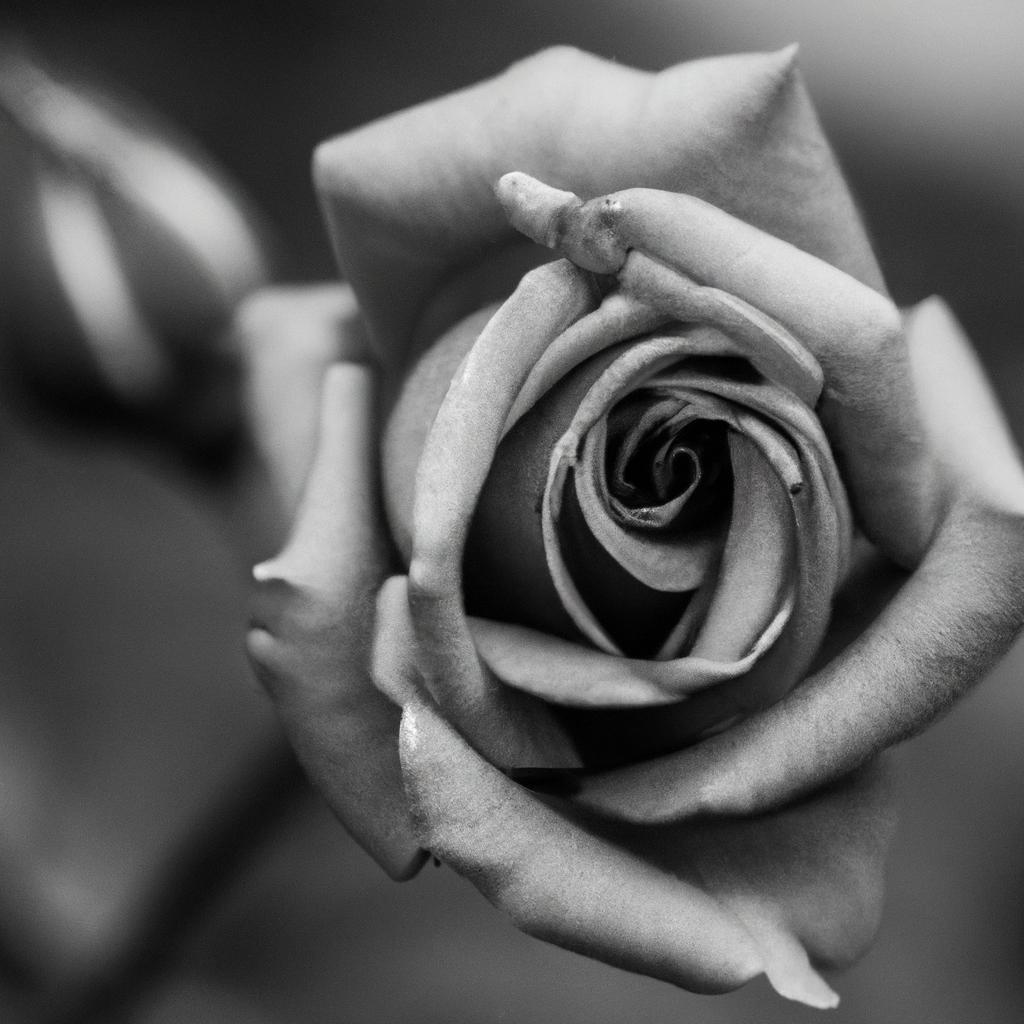

In [ ]:
# Gerando imagem:
gerar_imagem_por_url(imagem.data[0].url)